<a href="https://colab.research.google.com/github/ematevez/60345-Data-Engineering-Flex/blob/main/scoring_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/darsiltech/scoring-de-clientes.git

Cloning into 'scoring-de-clientes'...


##Scoring de Clientes

Basandome en un dataset real de un empresa financiera tomando el historico de 100 clientes activos hasta estos dias, busco crear una herramienta que me permita un mejor analisis comercial y de riesgo.

Los datos estan en un excel q esta subudo en dive:
https://docs.google.com/spreadsheets/d/11zQYsr3FVpSwXC5dZ-izM1UQqE5OtI6T/edit?usp=drive_link&ouid=115500018994462773408&rtpof=true&sd=true


Importacion de libreria y dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/100 casos.xlsx")
df.shape

(674, 24)

Tipos de Datos

In [ ]:
print('\nLostipos de datos son de tipo:\n',df.dtypes)


Lostipos de datos son de tipo:
 Cod Age                             int64
Agencia                            object
ID_CI                               int64
Solicitud                           int64
Aceptada                   datetime64[ns]
Producto                            int64
Nombre                             object
Tasa                              float64
Cap. solicitado                   float64
Cap. liquido                      float64
Cuotas                              int64
Mto Cuota                           int64
Familia                            object
Edad                                int64
Sexo                               object
Profesión                          object
Empresa                            object
Cant. Solic. Vigentes               int64
Cant. Solic. Canceladas             int64
Departamento                       object
Localidad                          object
Tipo de Venta                      object
Capital en mano                   float64
O

Primeras 5 filas

In [ ]:
df.head(5)

,Cod Age,Agencia,ID_CI,Solicitud,Aceptada,Producto,Nombre,Tasa,Cap. solicitado,Cap. liquido,...,Sexo,Profesión,Empresa,Cant. Solic. Vigentes,Cant. Solic. Canceladas,Departamento,Localidad,Tipo de Venta,Capital en mano,Origen
0,9,Bella Unión,7386,8351,2004-08-26,76,PROM JULIO/04 $3000,70.00,3195.0,3000.0,...,MASCULINO,PUBLICO,"ADMINISTRACION NAL, DE CORREOS",1,16,ARTIGAS,BU,NaN,3000.00,NaN
1,9,Bella Unión,7386,13994,2005-03-21,52,"BUEN CLIENTE 13-18 COOP,",63.47,5575.0,5000.0,...,MASCULINO,PUBLICO,"ADMINISTRACION NAL, DE CORREOS",1,16,ARTIGAS,BU,NaN,4104.40,NaN
2,10,Paysandú,11854,15914,2005-05-10,49,"STANDAR 07-12 COOP,",75.80,4500.0,4000.0,...,MASCULINO,PRIVADO,SUCESORES DE PEDRO WYAUX LARDO,0,9,PAYSANDU,PU,NaN,4000.00,NaN
3,9,Bella Unión,7386,25442,2005-11-17,127,PROMO 5000 SET 05,55.00,5225.0,5000.0,...,MASCULINO,PUBLICO,"ADMINISTRACION NAL, DE CORREOS",1,16,ARTIGAS,BU,NaN,2653.43,NaN
4,8,Colonia,10116,26530,2005-12-06,134,PROMO NOV 05 6000,52.20,6270.0,6000.0,...,FEMENINO,PUBLICO,EDUCACION PRIMARIA,0,8,COLONIA,CO,NaN,6000.00,NaN


El archivo contiene las siguientes hojas:

PS – Información sobre productos y solicitudes.

SOLICITU – Detalles de solicitudes de crédito.

CLIENTE – Información personal y financiera de los clientes.

CLEARING – Datos de historial crediticio.

MOVIM – Movimientos financieros de los clientes.

BCU – Información de calificación crediticia.

PGOCUO – Detalles de pagos de cuotas.



Publico objetivo para este analisis Gerente Comercial y Gerente de Riesgos.

In [ ]:
# Ruta del archivo en tu Drive (ajústala según tu ubicación)
file_path = "/content/drive/MyDrive/Colab Notebooks/100 casos.xlsx"

# Leer todas las hojas del archivo
xls = pd.ExcelFile(file_path)
print("Hojas disponibles:", xls.sheet_names)

# Cargar hojas clave para scoring
df_clientes = pd.read_excel(xls, 'CLIENTE')
df_clearing = pd.read_excel(xls, 'CLEARING')
df_solicitudes = pd.read_excel(xls, 'SOLICITU')
df_pagos = pd.read_excel(xls, 'PGOCUO')

# Mostrar primeras filas de cada dataset
print("Clientes:")
print(df_clientes.head())

print("\nClearing:")
print(df_clearing.head())

print("\nSolicitudes:")
print(df_solicitudes.head())

print("\nPagos:")
print(df_pagos.head())


Hojas disponibles: ['PS', 'SOLICITU', 'CLIENTE', 'CLEARING', 'MOVIM', 'BCU', 'PGOCUO', 'DETALLES']
Clientes:
   ID_CI  CliIngNom  CliIngLiq  CliIngLega  \
0   1020   55400.00   44144.00    52907.00   
1   1236  143888.89   93964.89   119862.89   
2   1331   16777.00   16036.00    16036.00   
3   1441   40925.33   29724.07    38879.07   
4   1620   39511.11   22190.11    37733.11   

                                      CliLaboral LocCod  \
0  JUBILADO                                          MO   
1  JUBILADO                                          MO   
2  JUBILADO                                          LP   
3  PASIVOS                                           LF   
4  JUBILADO                                          MO   

                  CliNacio  CliSexo                  CliNacion CliEstCiv  ...  \
0  1929-10-11 00:00:00.000        1  ORIENTAL                          V  ...   
1  1942-06-17 00:00:00.000        1  ORIENTAL                          V  ...   
2  1941-05-23 00

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

CLIENTE - Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_CI       100 non-null    int64  
 1   CliIngNom   100 non-null    float64
 2   CliIngLiq   100 non-null    float64
 3   CliIngLega  100 non-null    float64
 4   CliLaboral  100 non-null    object 
 5   LocCod      100 non-null    object 
 6   CliNacio    100 non-null    object 
 7   CliSexo     100 non-null    int64  
 8   CliNacion   100 non-null    object 
 9   CliEstCiv   100 non-null    object 
 10  ClideCrd    100 non-null    object 
 11  ClideEnd    100 non-null    object 
 12  CliHijos    100 non-null    int64  
 13  CliAcargo   100 non-null    int64  
 14  CliProf     100 non-null    int64  
 15  CliEmpNom   100 non-null    object 
 16  

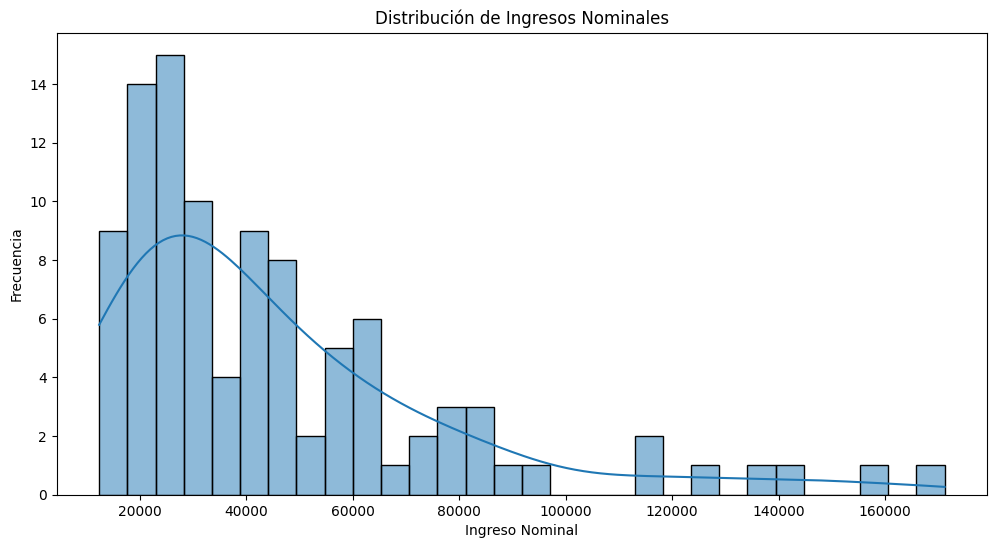

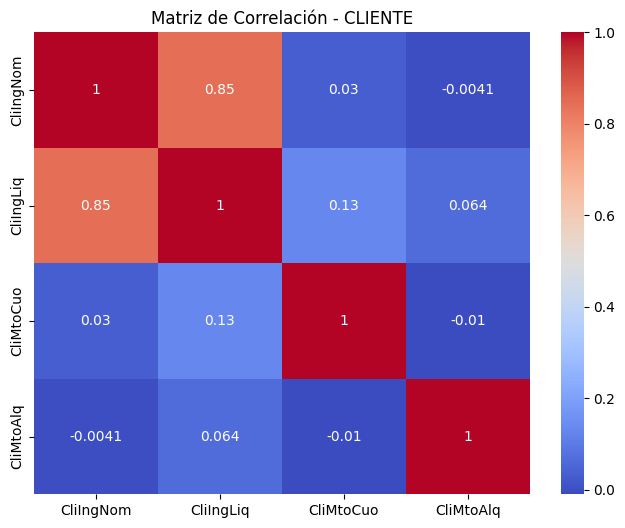

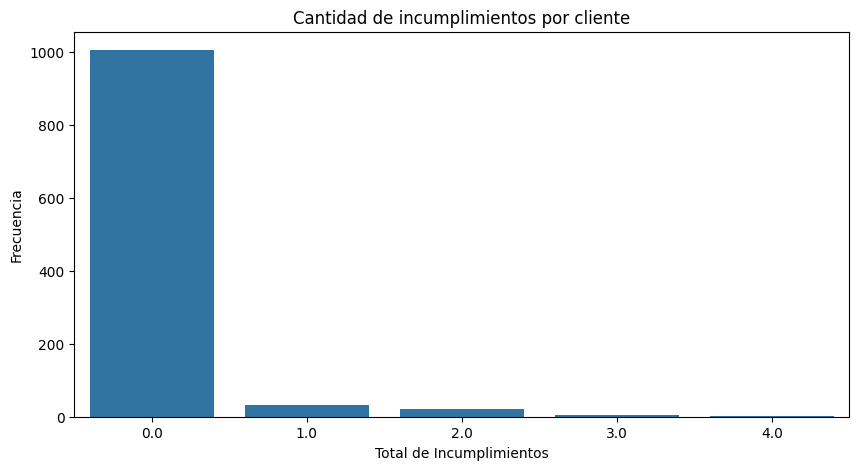

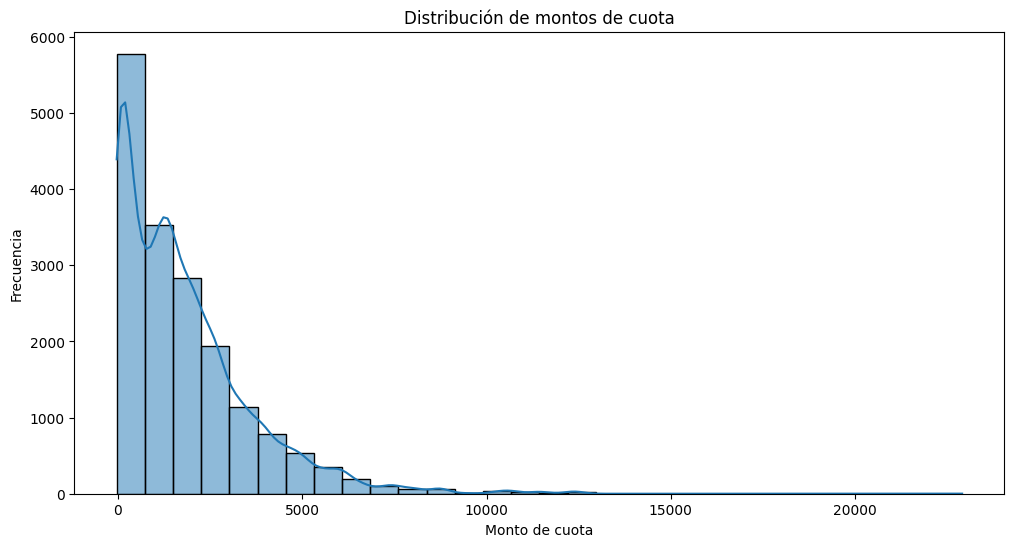

In [ ]:
# Importar librerías necesarias
import pandas as pd


# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en tu Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/100 casos.xlsx"

# Leer todas las hojas del archivo
xls = pd.ExcelFile(file_path)
df_clientes = pd.read_excel(xls, 'CLIENTE')
df_clearing = pd.read_excel(xls, 'CLEARING')
df_solicitudes = pd.read_excel(xls, 'SOLICITU')
df_pagos = pd.read_excel(xls, 'PGOCUO')

# Exploración inicial
def explorar_dataframe(df, nombre):
    print(f"\n{nombre} - Información:")
    print(df.info())
    print(f"\n{nombre} - Primeras filas:")
    print(df.head())
    print(f"\n{nombre} - Valores nulos:")
    print(df.isnull().sum())

explorar_dataframe(df_clientes, "CLIENTE")
explorar_dataframe(df_clearing, "CLEARING")
explorar_dataframe(df_solicitudes, "SOLICITU")
explorar_dataframe(df_pagos, "PGOCUO")

# Visualización de distribuciones
plt.figure(figsize=(12,6))
sns.histplot(df_clientes['CliIngNom'].dropna(), bins=30, kde=True)
plt.title('Distribución de Ingresos Nominales')
plt.xlabel('Ingreso Nominal')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de correlaciones entre variables relevantes
variables_relevantes = df_clientes[['CliIngNom', 'CliIngLiq', 'CliMtoCuo', 'CliMtoAlq']]
correlation_matrix = variables_relevantes.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - CLIENTE')
plt.show()

# Conteo de incumplimientos
plt.figure(figsize=(10,5))
sns.countplot(x='CleTIncum', data=df_clearing)
plt.title('Cantidad de incumplimientos por cliente')
plt.xlabel('Total de Incumplimientos')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de pagos
plt.figure(figsize=(12,6))
sns.histplot(df_pagos['PagCuota'].dropna(), bins=30, kde=True)
plt.title('Distribución de montos de cuota')
plt.xlabel('Monto de cuota')
plt.ylabel('Frecuencia')
plt.show()
